# Hebbian Learning

## Introduction

### The Ubiquity of Associations

How do you learn to associate things that occur together?

- Peaches and ____________?
- Cause and ____________?
- Law and ____________?
- Sooner or ____________?
- Jack and ____________ went up ______ ____________ ?

<details>
<summary>Solution</summary>

- Peaches and cream
- Cause and effect
- Law and order
- Sooner or later
- Jack and Jill went up the hill

</details>

You can automatically fill in most or all of the blanks using associations you have learned in the past. Associations are everywhere in cognition. You learn to associate all the different properties of individual objects, all the objects that make up familiar scenes, and generally any groups of people, properties, and/or things that tend to co-occur.

When you simply look at your laptop, you know about its weight, texture, range of likely temperatures, approximately how long the battery will operate before dying, and lots of other associated details. When you see only the top of a chair on the other side of a solid table, you automatically infer details about the rest of the chair that is out of sight - the top part of the chair that you see is strongly associated with the rest of a representation of a chair. 

What do you expect to see in the waiting room of a doctor's office? As each detail comes to mind, it triggers associations with other details: chairs to sit in while you wait -> coffee table -> magazines -> Oprah magazine, Sports Illustrated, The Economist -> cheap art on walls -> laminate flooring -> hand sanitizer -> clipboards with forms ->, etc. 
When you see lightning, what do you expect to hear? Associations can build up in *temporal proximity* (events occurring together in time, like lightning and thunder) and *spatial proximity* (objects that co-occur in space, like a chair and a table). Your stream of consciousness is partly built out of strong and weak associations. 

How does the brain learn associations in the first place?


### A Theory of Learning

Perhaps the most influential early theory in neuroscience is about learning associations, summarized as: "Neurons that fire together, wire together." The theory was advanced in great detail by Donald Hebb in 1949, who stated, "The general idea is an old one, that any two cells or systems of cells that are repeatedly active at the same time will tend to become 'associated,' so that activity in one facilitates activity in the other," and it is now called Hebbian Learning. It is an elegant theory because it is simple and can potentially explain many psychological and neuroscientific data. And it is also a mechanistic theory that we can explore by building models.

### Unsupervised Learning

Hebbian learning is a type of *unsupervised learning* because it can extract structure from data without using feedback. There are no answers provided in unsupervised learning, only an acquired representation of structure present in the data. In contrast, *supervised learning* usually involves a decision that can be correct or incorrect (e.g., Is this a picture of a dog or a cat?) and uses training and feedback to improve accuracy. Subsequent labs will explore supervised learning in detail. 

\\TODO: Add link to supervised learning lab or delete this paragraph

## Overview 

### concepts: 
Feature encoding \\
Correlation matrices \\
Simple Hebbian learning \\
Hebbian learning with pruning \\
Necker cubes \\

### tools: 
Matrix multiplication \\
Recurrent transfer mechanisms \\

## Code Examples

### Installation

In [2]:
%%capture
!pip install psyneulink

### Imports & Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import psyneulink as pnl

### Learning to Group Properties of Objects

Objects typically have multiple properties, such as size, shape, color, texture, density, temperature, etc. It is useful to learn to group the different properties of an object together.

In the following cell, we define a set of features to represent objects. The features include size (small, medium, large), color (red, blue, green), and shape (circle, rectangle, triangle). A feature is coded as `1` when it is present and `0` when it is absent.

Next, we specify some objects, such as a small red circle. Each object is represented as a stimulus in the model using a feature-coded vector. For example:

A small red circle is coded as `[1, 0, 0, 1, 0, 0, 1, 0, 0]` and abbreviated as `src`.


In [4]:
# Define the set of features
feature_names = [
    'small', 'medium', 'large',
    'red', 'yellow', 'blue',
    'circle', 'rectangle', 'triangle'
]

# Calculate the size of the feature space
size_f = len(feature_names)

# Define stimuli representing objects composed of features
small_red_circle =        [1, 0, 0, 1, 0, 0, 1, 0, 0]
medium_yellow_rectangle = [0, 1, 0, 0, 1, 0, 0, 1, 0]
large_blue_triangle =     [0, 0, 1, 0, 0, 1, 0, 0, 1]

# Note: Feature coding can be more elaborate, e.g., combining basic features.
# Represent green as the activation of blue + yellow, and use rectangle + triangle for a house
small_green_house = [1, 0, 0, 0, 1, 1, 0, 1, 1]

# Assign abbreviated aliases
src = small_red_circle
myr = medium_yellow_rectangle
lbt = large_blue_triangle
sgh = small_green_house

With our features defined, we can specify a collection of stimuli (`sm_3_uniform`) to present to the model. This collection is organized as a matrix where each row corresponds to a single stimulus, and each column represents a feature (as defined in `feature_names`). Here, the `sm_3_uniform matrix` contains three repetitions of each stimulus.

In [5]:
sm_3_uniform = np.matrix([src,src,src,myr,myr,myr,lbt,lbt,lbt])
sm_3_uniform

matrix([[1, 0, 0, 1, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 0, 1, 0, 0],
        [1, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 0, 1, 0],
        [0, 1, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 0, 1]])

You can also think about every feature as being represented by one artificial neuron in a system of neurons. For example, one neuron fires in response to objects with a "small" size, another fires for a "medium" size, and so on. Similarly, other neurons respond to colors like "red," "yellow," or "blue," or shapes like "circles" or "triangles." In our case, this amounts to a total of 9 feature neurons.  

When we present a multi-feature stimulus to the system, the corresponding neurons in the system are expected to fire simultaneously. As these neurons fire together, their connections should strengthen, mirroring how associations are formed in the brain. For example, if the system frequently encounters "red," "small," and "circle" together, these neurons will become linked. As a result, activating just one feature (e.g., "red") can trigger the activation of its associated features ("small" and "circle"). This process reflects the principle that neurons that fire together wire together.

### Hebbian Model #1

To model this, we will examine the activations for all stimuli. In this example, the stimuli are conveniently represented in the same way as their corresponding activation patterns, using 0s and 1s. As an example, consider the "red" neuron. When this neuron is active, we can examine which other neurons also tend to activate simultaneously. To quantify the relationships between neurons, we use a statistic called correlation. Correlation coefficients range from -1 to 1 and have two key characteristics:

1. Sign(+/-)
   - Positive(+): Two variables increase or decrease together (e.g., temperature and the volume of mercury).
   - Negative(-): As one variable increases, the other decreases (e.g., temperature and layers of clothing worn).
2. Strength
   - Values close to 1 or -1 indicate a strong relationship.
   - Values close to 0 indicate no relationship.
         
In the next cell, we compute a correlation matrix for the features of all our stimuli. The rows and columns represent the same set of feature neurons. Each value in the matrix indicates the correlation between two neurons. For example, the value at the intersection of the first row ("small" neuron) and the fifth column ("yellow" neuron) shows how often "small" and "yellow" fired together. (In Python, this value can be accessed using `cor_mat[0, 4]` since Python indexing starts at 0.)

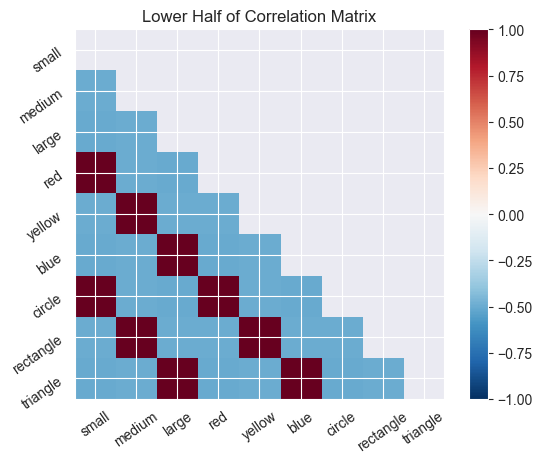

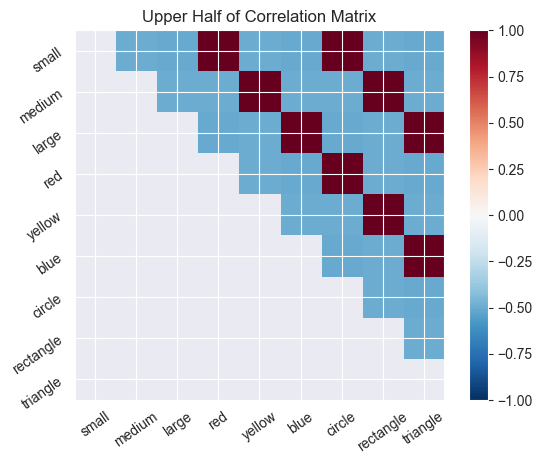

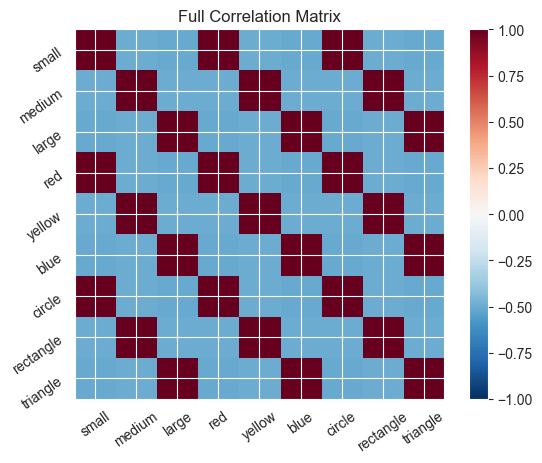

In [6]:
# Compute the correlation matrix
cor_mat_command = np.corrcoef(sm_3_uniform,
                              rowvar=False)  # rowvar=False indicates that the columns represent the features
ub = np.abs(cor_mat_command).max()  # Maximum absolute correlation value
lb = -ub  # Lower bound for the color scale


# Define a function to plot the correlation matrix
def plot_correlation_matrix(matrix, mask=None, title="Correlation Matrix"):
    """
    Function to plot a correlation matrix with optional masking
    """
    plt.figure()
    plt.title(title)
    plt.xticks(np.arange(len(feature_names)), feature_names, rotation=35)  # Rotate labels for better visibility
    plt.yticks(np.arange(len(feature_names)), feature_names, rotation=35)
    if mask is not None:
        matrix = np.ma.array(matrix, mask=mask)
    plt.imshow(matrix, cmap='RdBu_r', vmin=lb, vmax=ub)
    plt.colorbar()
    plt.show()


# Visualize lower half, upper half, and full correlation matrices
# Note: The correlation matrix is symmetric across the diagonal
plot_correlation_matrix(cor_mat_command, mask=np.triu(cor_mat_command), title="Lower Half of Correlation Matrix")
plot_correlation_matrix(cor_mat_command, mask=np.tril(cor_mat_command), title="Upper Half of Correlation Matrix")
plot_correlation_matrix(cor_mat_command, title="Full Correlation Matrix")


The correlation matrix, `cor_mat_command`, represents all connections between all neurons. The principal diagonal (top left to bottom right) is the self-correlation; a neuron is perfectly correlated with itself, so it should be all 1's. Except on the diagonal, every connection is depicted twice in this matrix. For example, [1,2] is the same value as [2,1].  

The correlation matrix can be thought of as the probability that the firing of two neurons will coincide, based on the frequency that their firing coincided in the past. The rows and columns of the matrix represent the features, ordered as they are in our feature list. Each entry represents the connection between a pair of neurons. One can think of the entries in the correlation matrix as directional probability, where the magnitude gives the strength of association, while the sign gives positive or negative association. 

Positive values mean that the neurons tend to both 1) fire together and 2) be inactive at the same time. Negative values mean that when one of the neurons is firing, the other one tends to be inactive (and vice a versa). Values close to 0 mean that the neurons do not exhibit a linear relationship in their patterns of activity. Note, the correlations only detect linear relationships. For example, if the activity of two neurons had a perfectly U shaped relationship that would produce a correlation of 0.)      

Once the connections between all the feature neurons have been established from learning, these connections can be useful for performing pattern completion. For example, if the model is given an object that is a "triangle", it can use the connections to infer that this object is probably also "large" and "blue".

### Stimulus Driven Activation

To demonstrate how the trained model (the correlation matrix, `cor_mat_command`) responds to stimuli, we expose it to an incomplete stimulus. The model should complete the stimulus based on the learned associations. 

Consider the following incomplete stimulus: `[0, 0, 0, 0, 0, 0, 0, 0, 1]`. This stimulus represents only a "triangle." We can use the learned associations to predict the other features of the object by multiplying the incomplete stimulus by the correlation matrix. The resulting vector will contain the predicted activations for all features.


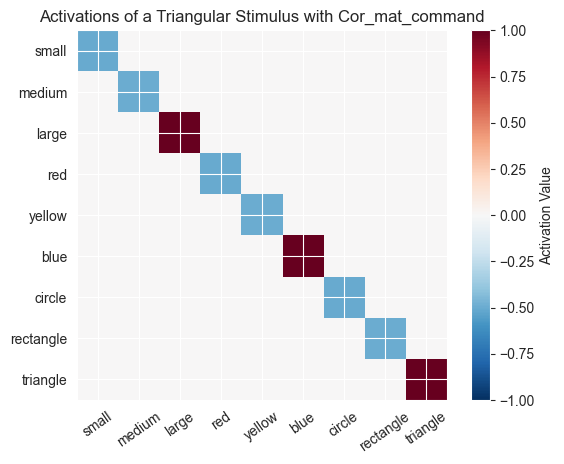

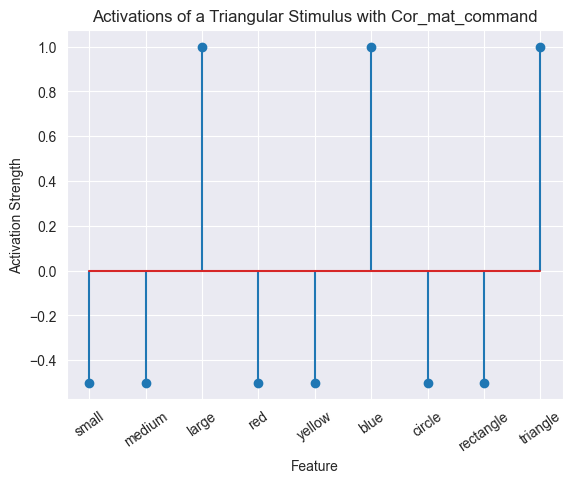

In [9]:
# Define the incomplete stimulus
triangle = [0, 0, 0, 0, 0, 0, 0, 0, 1]

# Step 1: Construct a diagonal matrix from the stimulus vector
# This represents activating only the "triangle" neuron
diag_triangle = np.diag(triangle)

# Step 2: Multiply the diagonal matrix with the correlation matrix
# This selects and scales rows of the correlation matrix based on the stimulus
# It represents how activating the "triangle" neuron propagates activation to other neurons
active_mat = np.dot(diag_triangle, cor_mat_command)

# Step 3: Sum the rows to compute the total activation for each feature
# This consolidates the contributions from the activated neurons
active_mat = active_mat.sum(axis=0)

# This plot visualizes the activations from a triangular stimulus. The output is an array,
# and its values are mapped to the principal diagonal of this image. All off-diagonal elements are zero.
plt.figure()
plt.title("Activations of a Triangular Stimulus with Cor_mat_command")
plt.imshow(np.diag(active_mat), cmap='RdBu_r', vmin=lb, vmax=ub)
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=35)
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.colorbar(label="Activation Value")
plt.show()

# This plot shows the same values but as a line plot.
plt.figure()
plt.stem(active_mat)
plt.title("Activations of a Triangular Stimulus with Cor_mat_command")
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=35)
plt.xlabel("Feature")
plt.ylabel("Activation Strength")
plt.show()

### Accumulating Evidence 

In the previous example we made an over-simplifying assumption that the stimuli were all present at the same time. But most learning doesn't happen at a single moment in time, it builds up over experience.  We also computed correlations that include negative values, but the most basic implementation of "fire together wire together" should only detect simultaneous firing, not simultaneous absences of firing. So next we can build a model that accumulates evidence over time and only detects neurons firing together.  

### Hebbian Model #2

We start with an empty connectivity matrix, full of 0's to indicate that no neurons are wired together yet.  When two neurons fire at the same time we'll add a weight of 0.1 to the matrix.

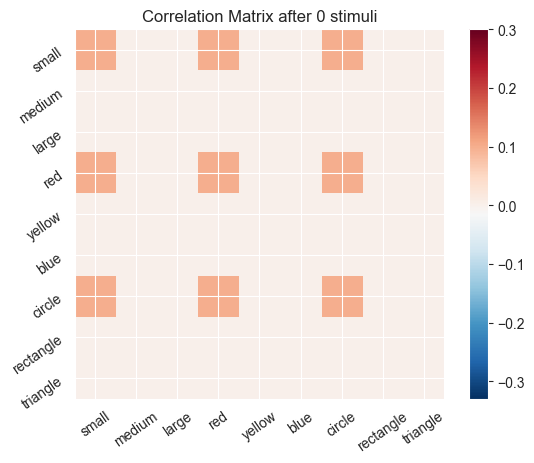

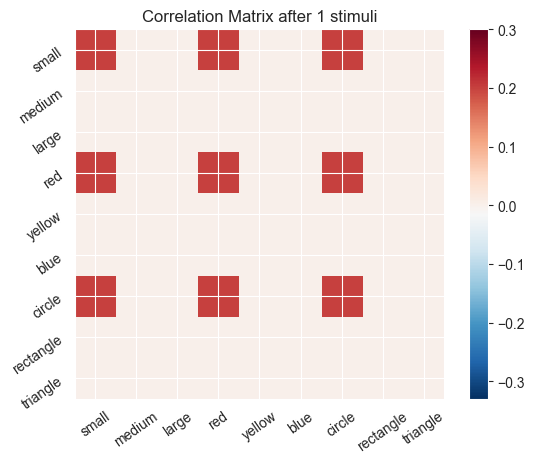

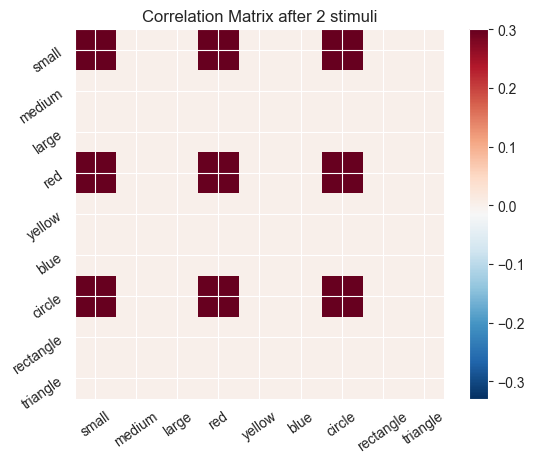

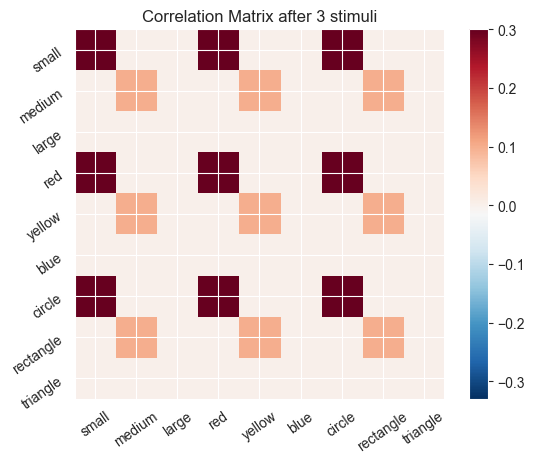

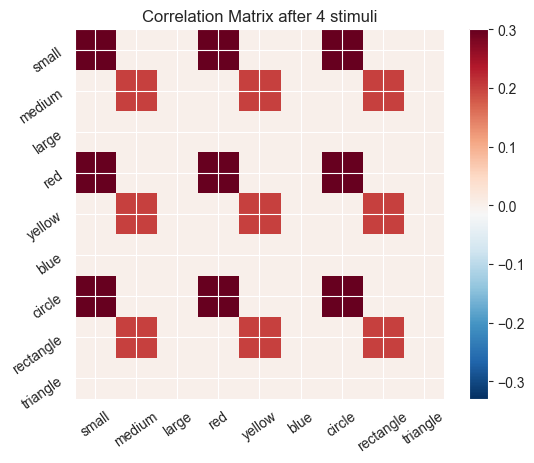

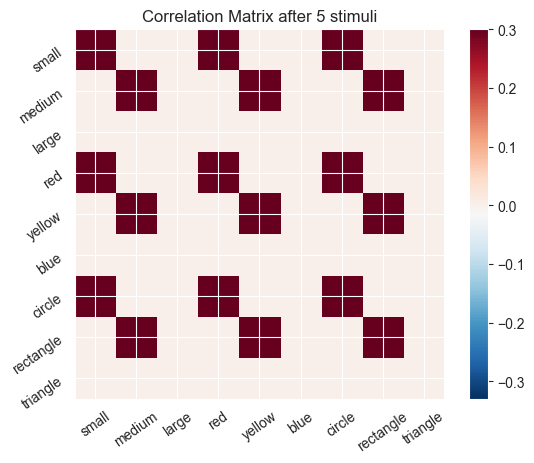

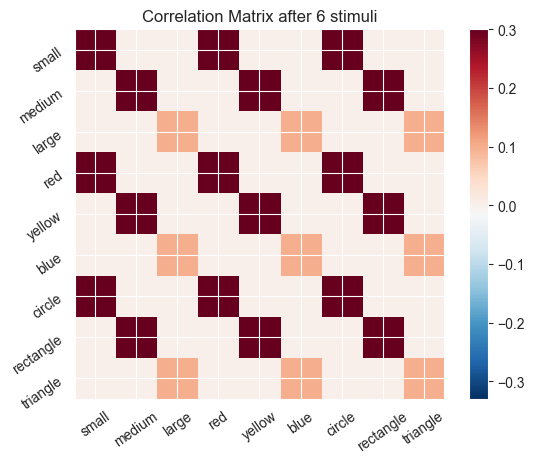

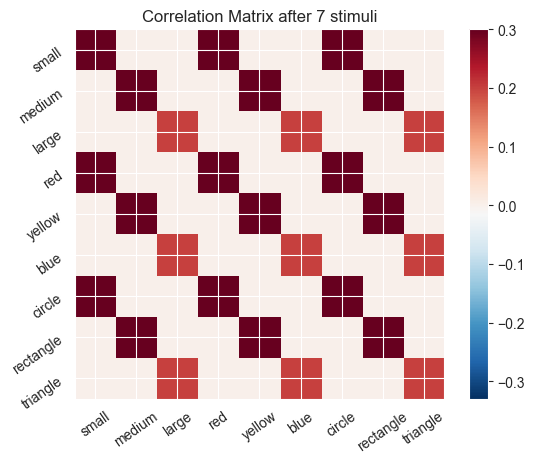

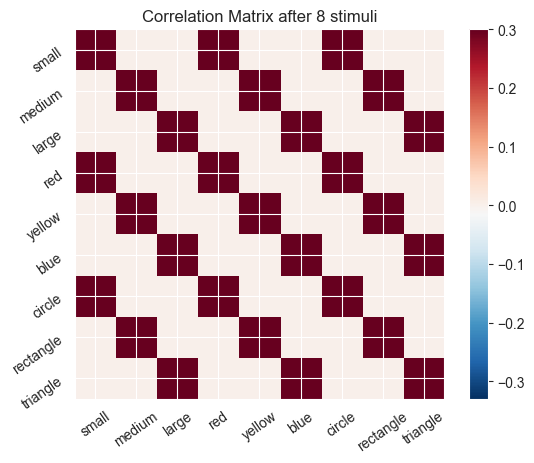

In [20]:
# Create a new, all zeros correlation matrix
cor_mat_manual = np.zeros((size_f, size_f))

# Get the number of stimuli (number of rows in sm_3_uniform)  
size_s = sm_3_uniform.shape[0]

# Define the learning rate as a parameter - this is how much the weights will change each stimulus
learning_rate = .1

for i, stim in enumerate(sm_3_uniform):  # progress through all stimuli
    for x in range(size_f):
        for y in range(size_f):
            cor_mat_manual[x, y] = cor_mat_manual[x, y] + (stim[0, x] * stim[0, y] * learning_rate)
    # Plot the correlation matrix after each stimulus
    plt.figure()
    plt.title(f'Correlation Matrix after {i} stimuli')
    plt.xticks(np.arange(0, size_f), feature_names, rotation=35)
    plt.yticks(np.arange(0, size_f), feature_names, rotation=35)
    plt.imshow(cor_mat_manual, cmap='RdBu_r', vmin=ub, vmax=lb)
    plt.colorbar()
    plt.show()

## Exercises

### Exercise 1

Suppose you want to know what a Hebbian Model #1 learner would associate and infer if instead of the stimuli described in [Learning to Group Properties of Objects](#learning-to-group-properties-of-objects), they had seen 10 small red circles, 7 medium yellow rectangles, and 4 large blue triangles. Then, for the first time, they are exposed to the color purple. 
 
Create a set of stimuli and then a correlation matrix that fit this situation. How do you code purple as a stimulus? What output do you get from testing the trained model on an input of purple?  Explain how you interpret this output.



In [ ]:
# Create a set of stimuli
stimulus_matrix = ...

# Compute the correlation matrix with numpy
correlation_matrix = ...

# Define the purple stimulus
purple = ...

# Compute the activations for the purple stimulus
...
active_mat_purple = ...

# Plot the activations for the purple stimulus
plt.figure()
plt.stem(active_mat_purple)
plt.title("Activations of a Purple Stimulus")
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=35)
plt.xlabel("Feature")
plt.ylabel("Activation Strength")
plt.show()

<details><summary><b>Solution</b></summary>
 
```python
# Create a set of stimuli
stimulus_matrix = np.matrix([src] * 10 + [myr] * 7 + [lbt] * 4)

# Compute the correlation matrix with numpy
correlation_matrix = np.corrcoef(stimulus_matrix, rowvar=False)

# Define the purple stimulus
purple = [0, 0, 0, .5, 0, .5, 0, 0, 0]

# Compute the activations for the purple stimulus
diag_purple = np.diag(purple)
active_mat_purple = np.dot(diag_purple, cor_mat_command)
active_mat_purple = active_mat_purple.sum(axis=0)

# Plot the activations for the purple stimulus
plt.figure()
plt.stem(active_mat_purple)
plt.title("Activations of a Purple Stimulus")
plt.xticks(np.arange(len(feature_names)), feature_names, rotation=35)
plt.xlabel("Feature")
plt.ylabel("Activation Strength")
plt.show()
```

### Exercise 2

In the example of [Hebbian Model #2](#hebbian-model-2) above, we used 3 loops to update all the values in cor_mat. You should reason through how and why this works by considering a few specific examples. When i = 0, what are the values of stim?  When x and y equal 0, what number will be updated in cor_mat?

#### Exercise 2a

There is a more compact way to accomplish the same result as the 3 loops above, using the transpose function and a single loop.    

You can transpose an array (turn rows into columns, and columns into rows) by adding .T to the array:

```python
stim_mat[0,:].T
```

And you can do matrix multiplication of two arrays with the appropriate dimensionality using @:

```python
stim_mat[0,:].T@stim_mat[0,:] 
```

Now create a single loop that progresses through the stimuli in stim_mat and creates the same resulting cor_mat2 values as above.  


In [ ]:
# Create a new, all zeros correlation matrix
cor_mat_compact = np.zeros((size_f, size_f))

# Get the number of stimuli (number of rows in sm_3_uniform)  
size_s = sm_3_uniform.shape[0]

# Define the learning rate as a parameter - this is how much the weights will change each stimulus
learning_rate = .1

for i, stim in sm_3_uniform:  # progress through all stimuli
  cor_mat_compact = ...

# Verify that we got the same answer as before

# allclose returns True if each entry of the first array is equal to the corresponding entry in the second, and False otherwise 
same_ans=np.allclose(cor_mat_compact, cor_mat_manual) 
if same_ans:
  print('cor_mat_compact and cor_mat_manual matrices are equal')

<details><summary><b>Solution</b></summary>
 
```python
# Create a new, all zeros correlation matrix
cor_mat_compact = np.zeros((size_f, size_f))

# Get the number of stimuli (number of rows in sm_3_uniform)  
size_s = sm_3_uniform.shape[0]

# Define the learning rate as a parameter - this is how much the weights will change each stimulus
learning_rate = .1

for i, stim in sm_3_uniform:  # progress through all stimuli
  cor_mat_compact = cor_mat_compact +  learning_rate * stim.T@stim

# Verify that we got the same answer as before

# allclose returns True if each entry of the first array is equal to the corresponding entry in the second, and False otherwise 
same_ans=np.allclose(cor_mat_compact, cor_mat_manual) 
if same_ans:
  print('cor_mat_compact and cor_mat_manual matrices are equal')
```

#### Exercise 2b

Matrix multiplication can simplify the code even more, eliminating the need for any loops.  Use the transpose function .T and matrix multiplication function @ to matrix multiply stim_mat by itself transposed.  As a final step, multiply this entire function by a value that will reproduce the same matrix values in cor_mat above.

In [ ]:
cor_mat_compactest = ...

# Verify correctness
same_ans = np.allclose(cor_mat_compactest,cor_mat_manual) 
if same_ans:
  print('cor_mat_compactest and cor_mat_manual matrices are equal')

<details><summary><b>Solution</b></summary>
 
```python
cor_mat_compactest = m_3_uniform.T @ sm_3_uniform * learning_rate

# Verify correctness
same_ans = np.allclose(cor_mat_compactest,cor_mat_manual) 
if same_ans:
  print('cor_mat_compactest and cor_mat_manual matrices are equal')
```

In [21]:
cor_mat_compactest = s



cor_mat_compactest and cor_mat_manual matrices are equal
